# Test of CSBM

In [1]:
import torch
from torch_geometric.data import Data

In [2]:
import numpy as np
from collections import Counter

## Draw class labels of 10 classes with uniform distribution

In [3]:
categories = list(range(1, 11))
probabilities = [0.1] * 10

In [4]:
n = 50
draw = np.random.choice(categories, n, p=probabilities)

In [5]:
# class labels
draw

array([ 5,  5,  5,  4,  2, 10,  7,  8,  5, 10,  8,  1,  2,  7,  8,  2,  2,
        6,  7, 10,  2,  8,  1,  8, 10,  4,  7,  4,  5,  7,  5,  5,  7,  3,
        3,  4,  2,  9, 10,  6,  1,  5,  8,  6,  4,  7,  4,  2,  8,  3])

In [6]:
print(sorted([(cls, occ) for cls, occ in Counter(draw).items()]))

[(1, 3), (2, 7), (3, 3), (4, 6), (5, 8), (6, 3), (7, 7), (8, 7), (9, 1), (10, 5)]


## Draw random vectors from the same class

In [7]:
mean = np.ones(9)
mean = mean / np.linalg.norm(mean)
mean

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [8]:
cov = 0.1 * np.eye(9)
cov

array([[0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1]])

In [9]:
X = np.random.multivariate_normal(mean, cov, 5)
X

array([[ 0.7328078 ,  0.03299125,  0.4364974 ,  0.30017546,  0.4422316 ,
         0.59155333,  0.27350831,  0.59988279,  0.45634128],
       [-0.21646132,  0.73003902,  0.05175026,  0.54887896, -0.15987008,
         0.32373254,  0.06377228,  0.53732608,  0.25497735],
       [ 0.3639536 ,  0.53837655,  0.85632149,  0.73246542,  0.11308586,
         0.6302199 ,  0.46387022,  0.50653051,  0.14617599],
       [ 0.30505935,  0.39018492,  0.34407854, -0.07020154,  0.4384005 ,
         0.57953256,  0.42173896, -0.0513029 ,  0.19885997],
       [ 0.33854707,  0.0683855 ,  0.17664304, -0.42102856,  0.24321607,
         0.40863714,  0.13767985,  0.44983449, -0.20038413]])

In [10]:
import matplotlib.pyplot as plt

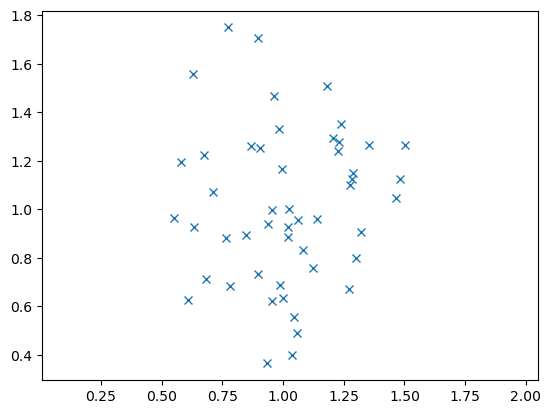

In [11]:
m = [1, 1]
sigma_square = 0.1
cv = np.eye(2) * sigma_square
x, y = np.random.multivariate_normal(m, cv, 50).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [12]:
import networkx as nx
import torch_geometric

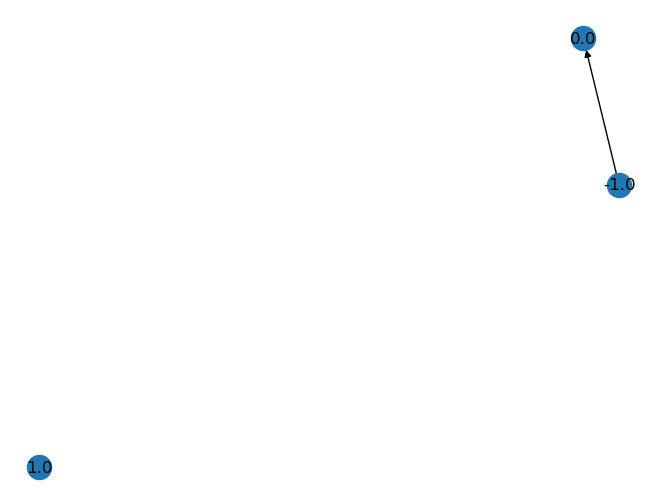

In [13]:
edge_index = torch.tensor([[0],
                          [1]], dtype=torch.long)
#edge_index.add(torch.tensor([[1], [1]], dtype=torch.long))
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
g = torch_geometric.utils.to_networkx(data, to_undirected=False)
labeld = {node: val for node, val in enumerate(list(x.numpy().flatten()))}
nx.draw(g, labels=labeld, with_labels=True)

In [14]:
edge_index

tensor([[0],
        [1]])

In [15]:
import MultiClassCSBM
csbm = MultiClassCSBM.MultiClassCSBM(classes=4, dimensions=12)
print(csbm.means)

[[1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
  1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081]
 [1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
  1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081]
 [1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
  1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081]
 [1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
  1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081]]
